In [1]:
dat = read.csv('../data/AVM_day0_spectra.csv', sep='\t')

In [2]:
ppm = rev(as.numeric(dat[['X']]))
spectra = t(as.matrix(dat[c(2:17)]))
spectra = spectra[, ncol(spectra): 1]

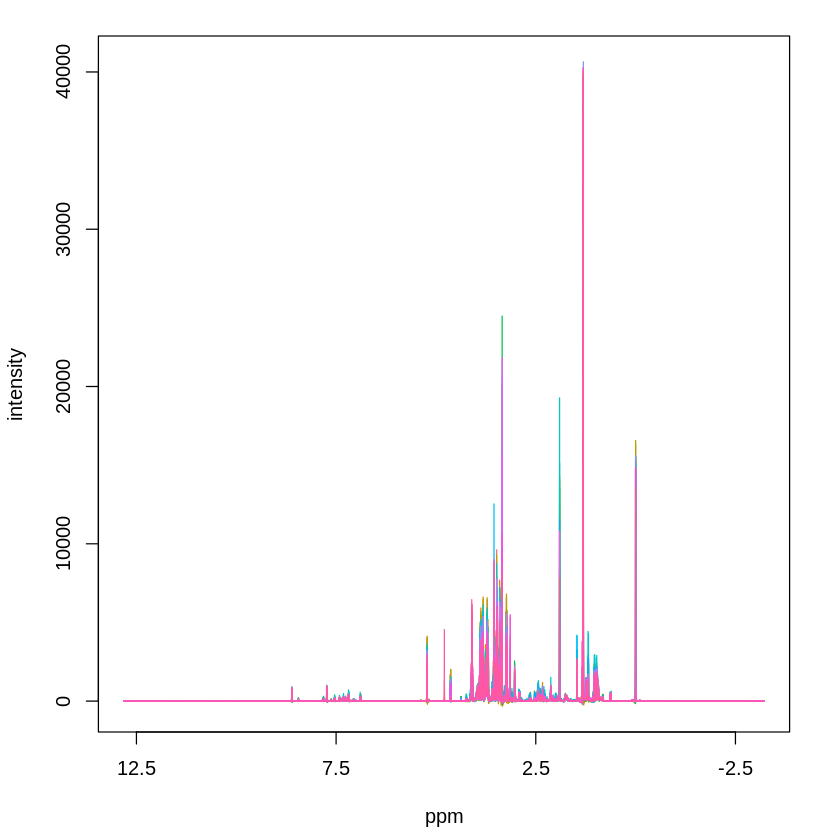

In [3]:
library(speaq)
speaq::drawSpecPPM(Y.spec = spectra, 
                   X.ppm = ppm)
#                    title = 'Wine data spectra', 
#                    groupFactor = wine.color, 
#                    legend.extra.x = 1, 
#                    legend.extra.y = 1.1)

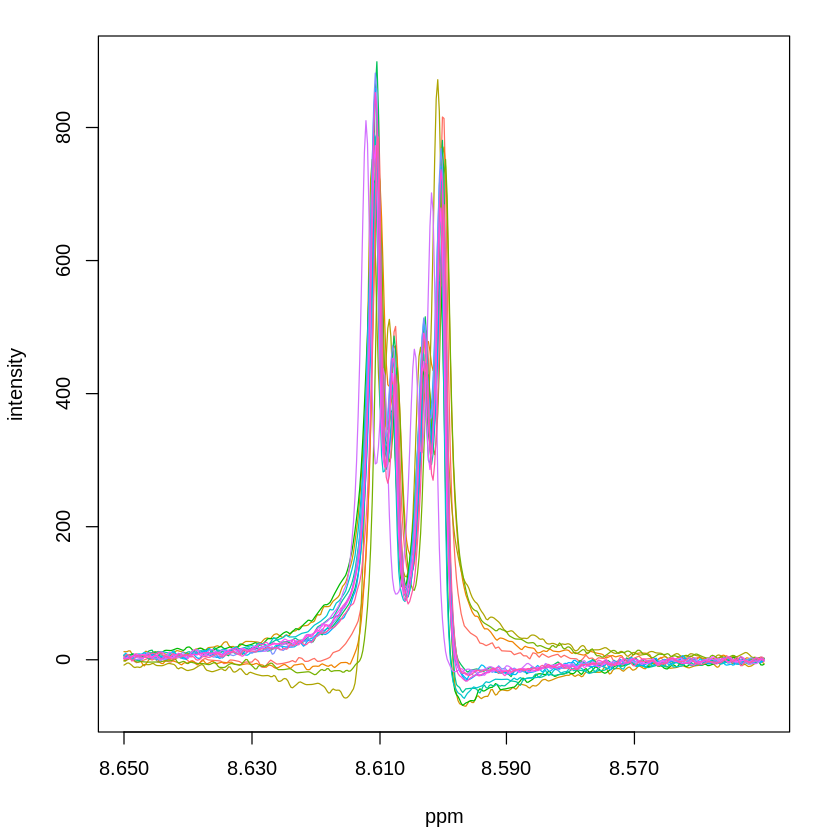

In [5]:
# small excerpt by defining the region of interest
speaq::drawSpecPPM(Y.spec = spectra, 
                   X.ppm = ppm, 
                   legend.extra.x = 1.05, 
                   legend.extra.y = 1.0,
                   ROI.ppm = 8.6, 
                   ROI = NULL, 
                   roiWidth.ppm = 0.05,
                   legendpos = "topright" )

In [28]:
peaks <- speaq::getWaveletPeaks(Y.spec=spectra, 
                                     X.ppm=ppm,
                                     window.split=16,
                                     baselineThresh = 10,
                                     SNR.Th = -1, 
                                     nCPU = -1,
                                     include_nearbyPeaks = TRUE)

[1] "detecting peaks"
  |======================================================================| 100%
[1] "fixing duplicate detections"
  |======================================================================| 100%


In [29]:
peaks[peaks$peakPPM < 8.65 & peaks$peakPPM > 8.59,]

,peakIndex,peakPPM,peakValue,peakSNR,peakScale,Sample
72,17180,8.61040,1336.59536,28.1354916,10.0,1
73,17222,8.60013,1326.38687,27.9206018,10.0,1
743,17181,8.61015,1384.40461,44.7820968,11.0,2
744,17223,8.59988,1369.60022,44.3032113,11.0,2
1431,17179,8.61064,1356.04609,46.2967020,11.0,3
1432,17221,8.60037,1249.16480,42.6476734,10.0,3
2136,17093,8.63167,21.84424,1.0637885,16.0,4
2137,17177,8.61113,1389.48780,34.7749530,10.0,4
2138,17219,8.60086,1419.21600,35.5189658,11.0,4
2838,17096,8.63094,17.76228,1.1745579,15.0,5


In [30]:
grouped <- speaq::PeakGrouper(Y.peaks = peaks,
                                   min.samp.grp = 5,
                                   grouping.window.width = 10)

[1] "regrouping peaks"
  |======================================================================| 100%
[1] "verifying regroupment"
  |======================================================================| 100%


In [31]:
grouped[grouped$peakPPM < 8.65 & grouped$peakPPM > 8.59,]

,peakIndex,peakPPM,peakValue,peakSNR,peakScale,Sample
33,17179,8.61040,1336.595,28.13549,10,1
34,17179,8.61015,1384.405,44.78210,11,2
35,17179,8.61064,1356.046,46.29670,11,3
36,17179,8.61113,1389.488,34.77495,10,4
37,17179,8.60991,1163.820,28.65018,10,5
38,17179,8.61089,1217.178,36.35207,11,6
39,17179,8.61040,1398.346,29.53633,11,7
40,17179,8.61040,1225.892,32.20596,11,8
41,17179,8.61089,1246.758,33.41075,11,9
42,17179,8.61064,1425.112,34.87531,11,10


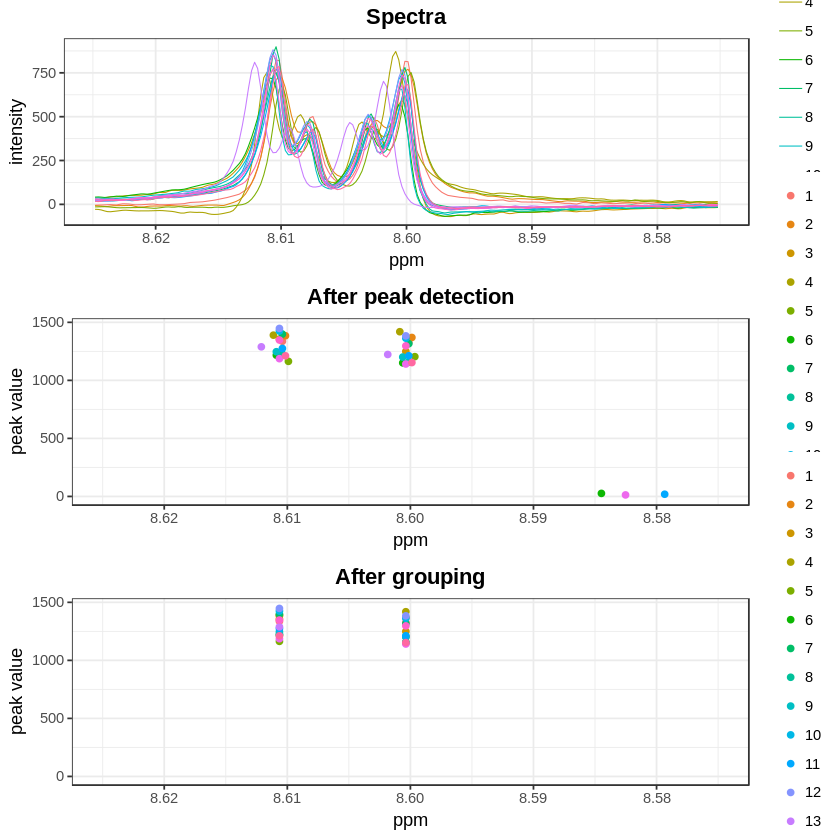

In [32]:
# adding labels to the dat a for plotting and the group ppm values
library(ggplot2)
ROI.ppm <- 8.6
roiWidth.ppm <- 0.025

speaq::ROIplot(Y.spec = spectra, 
               X.ppm = ppm, 
               ungrouped.peaks = peaks,
               grouped.peaks = grouped, 
               ROI.ppm = ROI.ppm,
               roiWidth.ppm = roiWidth.ppm)
#                groupLabels = as.factor(wine.color))

DataMatrix is not a matrix, attempting conversion with the assumption of only 1 variable (1 column)


[1] "Computing dissimilarity matrix"
[1] "Computing silhouette values"
  |====================================================================================================| 100%


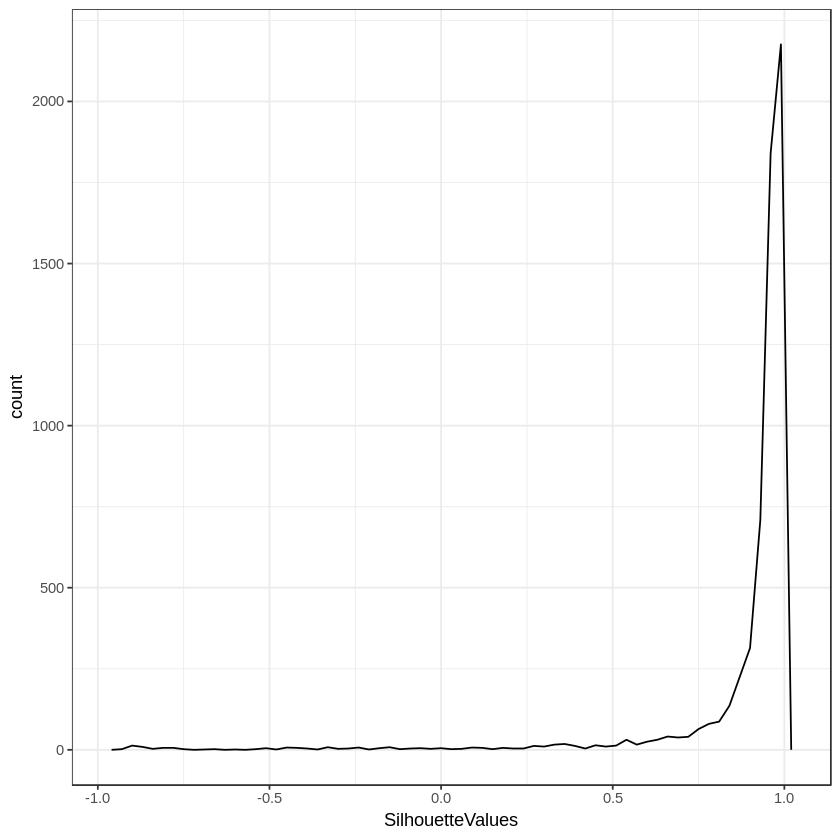

In [34]:
SilhouetteValues <- speaq::SilhouetR(DataMatrix = grouped$peakPPM, 
                                     GroupIndices = grouped$peakIndex)
Silh_plot <- ggplot(SilhouetteValues, aes(SilhouetteValues)) +
             geom_freqpoly(binwidth = 0.03) +
             theme_bw()
Silh_plot

In [35]:
groups <- unique(SilhouetteValues$GroupIndices)
Ngroups <- length(groups)
sil_means <- matrix(NA, ncol = 3, nrow = Ngroups)

for (k in 1:Ngroups) {
    sil_means[k, 1] = groups[k]
    sil_means[k, 2] = mean(SilhouetteValues$SilhouetteValues[SilhouetteValues$GroupIndices == 
        groups[k]])
    sil_means[k, 3] = mean(grouped$peakSNR[grouped$peakIndex == groups[k]])
}

sil_means <- sil_means[order(sil_means[, 2]), ]
colnames(sil_means) <- c("groupIndex", "avg_silhouette_val", "avg. SNR")

a = sil_means[rev(order(sil_means[, 'avg. SNR'])), ]
a[a[, 'avg_silhouette_val'] < 0.25, ]

groupIndex,avg_silhouette_val,avg. SNR
34997,-0.14970357,16.641021
20147,0.21550754,8.938688
19357,-0.03214947,7.999431
23746,0.15447477,7.937898
26584,-0.89303409,7.266271
41063,0.11987971,4.052362
18947,-0.12937142,3.905269
28888,-0.05135510,3.176734
51491,0.23844716,2.960809
17653,-0.21185471,2.736229


In [38]:
filled <- speaq::PeakFilling(Y.grouped = grouped, 
                                  Y.spec = spectra,  
                                  max.index.shift = 200,
                                  nCPU = -1)

[1] "There are 16 samples in the dataset."
  |======================================================================| 100%


In [39]:
features <- speaq::BuildFeatureMatrix(filled)

In [133]:
head(filled[filled$peakSNR > 10 & filled$peakValue > 30 & filled$peakPPM < 8.35, ], 50)

,peakIndex,peakPPM,peakValue,peakSNR,peakScale,Sample
444,18309,8.33652,44.09132,12.40039,16.0,1
448,18309,8.33432,44.97916,10.53945,16.0,6
449,18309,8.33359,44.22095,10.58124,9.5,7
450,18309,8.33212,53.32261,11.94140,16.0,8
451,18309,8.33530,49.79255,12.94223,11.5,9
454,18309,8.33677,68.18756,15.97117,9.0,13
600,19223,8.11131,49.29976,12.64402,13.0,2
601,19223,8.11253,41.72178,11.03209,16.0,3
604,19223,8.11058,65.24025,15.01739,16.0,8
605,19223,8.11253,41.09193,10.19527,13.0,9


In [79]:
features.scaled <- speaq::SCANT(data.matrix = features, 
                                     type = c("pareto", "center"))

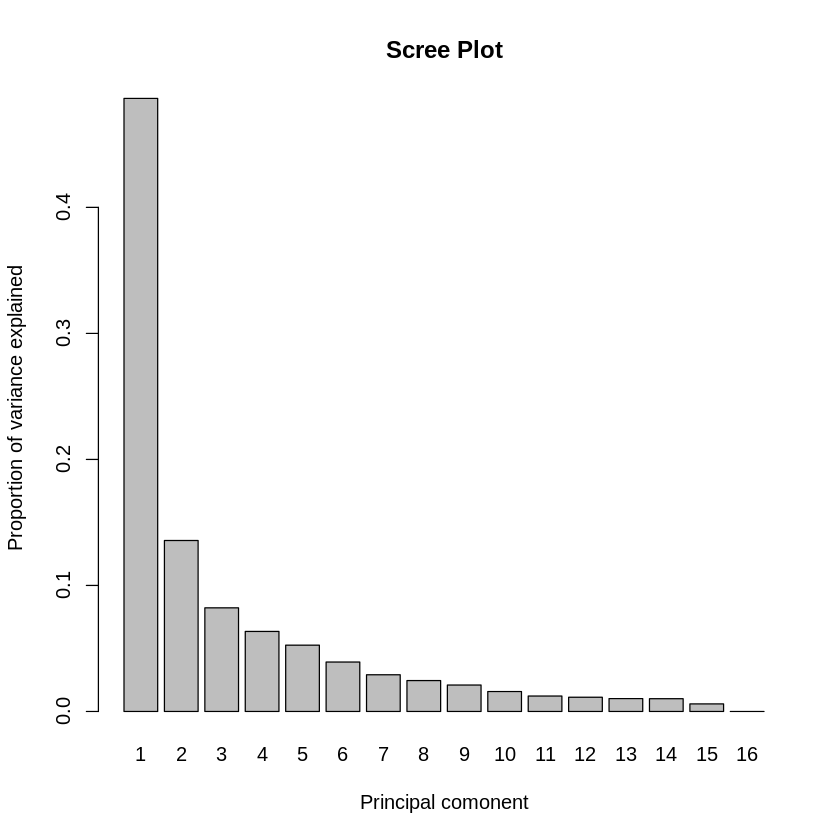

In [80]:
common.pca <- prcomp(features.scaled) 


loadings <- common.pca$rotation
scores <- common.pca$x
varExplained <- common.pca$sdev^2

barplot(varExplained/sum(varExplained), 
        main="Scree Plot",ylab="Proportion of variance explained", 
        xlab = "Principal comonent", 
        names.arg = as.character(seq(1,length(varExplained))))

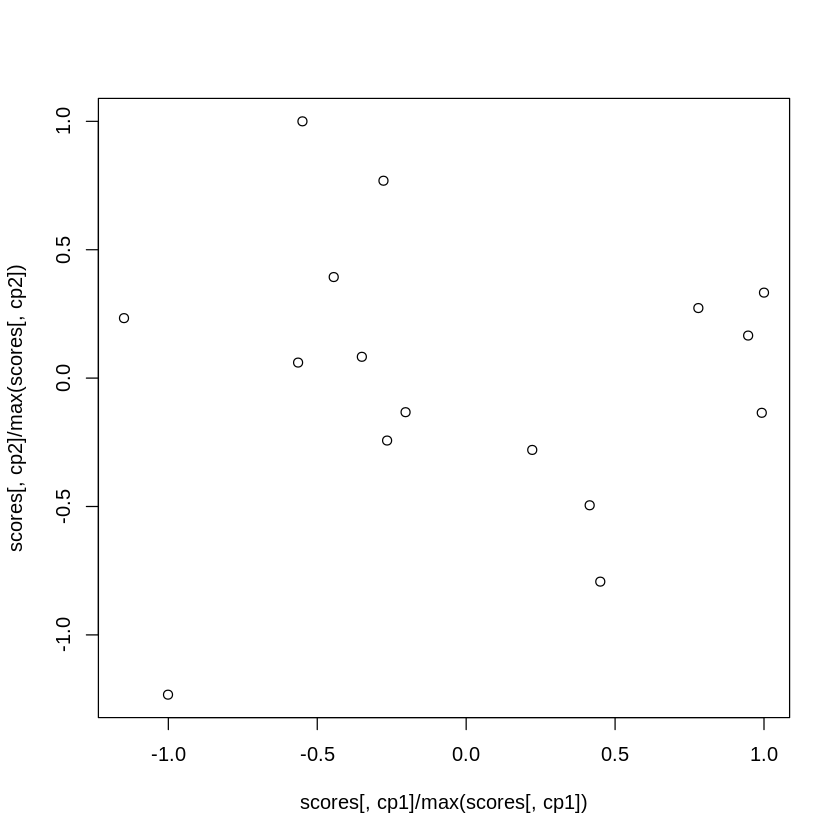

In [82]:
# plot.marks <- as.numeric(wine.color)
# plot.marks[plot.marks == 1] <- 8 
# plot.marks[plot.marks == 2] <- 15
# plot.marks[plot.marks == 3] <- 1

cp1 <- 1
cp2 <- 2 
plot(scores[,cp1]/max(scores[,cp1]), scores[,cp2]/max(scores[,cp2]))